In [2]:
#First we import the libraries we are going to be using.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lets read our dataset and have a first look.

europe = pd.read_csv(r"C:\Users\dani-\OneDrive\Escritorio\Python\Projects\DANIEL VILLARES PORTFOLIO\Economy_Indicators.csv")
europe.head()

,Country,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Euro Area,14493,4.1,0.8,1.25,10.0,6.6,-5.1,95.6,2.5,342.56
1,Germany,4223,1.7,0.1,1.25,10.0,5.5,-3.7,69.3,7.4,83.16
2,United Kingdom,3187,4.4,0.2,2.25,9.9,3.5,-6.0,95.9,-2.6,67.53
3,France,2937,4.2,0.5,1.25,5.6,7.4,-6.5,112.9,0.4,67.63
4,Italy,2100,5.0,1.1,1.25,8.9,7.8,-7.2,150.8,2.5,59.24


In [3]:
#Lets have a look at what type of data we have.
europe.dtypes

Country                       object
GDP                            int64
GDP Year-over-Year           float64
GDP Quarter-over-Quarterr     object
Interest Rate                 object
Inflation Rate               float64
Jobless Rate                 float64
Gov. Budget                  float64
Debt/GDP                     float64
Current Account              float64
Population                   float64
dtype: object

In [4]:
#GDP Quarter over quarter and interest rate columns are strings and not floats.

print(europe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    42 non-null     object 
 1   GDP                        42 non-null     int64  
 2   GDP Year-over-Year         42 non-null     float64
 3   GDP Quarter-over-Quarterr  42 non-null     object 
 4   Interest Rate              42 non-null     object 
 5   Inflation Rate             42 non-null     float64
 6   Jobless Rate               42 non-null     float64
 7   Gov. Budget                42 non-null     float64
 8   Debt/GDP                   42 non-null     float64
 9   Current Account            42 non-null     float64
 10  Population                 42 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.7+ KB
None


In [5]:
#Apparently there are no null values. Lets look at the description.
europe.describe(include='all')

,Country,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
count,42,42.000000,42.000000,42,42,42.00000,42.000000,42.000000,42.000000,42.000000,42.000000
unique,42,NaN,NaN,28,20,NaN,NaN,NaN,NaN,NaN,NaN
top,Euro Area,NaN,NaN,0.9,1.25,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,4,20,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,930.666667,3.245952,NaN,NaN,14.95000,7.103571,-3.569048,64.829524,0.192857,27.893333
std,NaN,2341.577107,6.994028,NaN,NaN,12.46537,5.151838,3.501880,37.718270,5.772407,58.400889
min,NaN,9.000000,-37.200000,NaN,NaN,3.30000,1.900000,-8.900000,18.100000,-11.600000,0.370000
25%,NaN,62.250000,2.372500,NaN,NaN,9.07500,4.000000,-6.150000,41.525000,-2.850000,2.807500
50%,NaN,233.000000,3.930000,NaN,NaN,11.63500,5.750000,-3.900000,54.900000,-0.750000,7.770000
75%,NaN,662.250000,6.075000,NaN,NaN,17.35000,8.400000,-1.175000,79.375000,2.950000,18.770000


In [6]:
print(europe['Interest Rate'].unique())

['1.25' '2.25' '7.5' '12' '0.5' '6.75' '1.75' '0.65' '6.25' '7' '25' '13'
 '0' '2.5' '4' '5.75' '3.63' '21.5' '3' '            NA']


In [7]:
print(europe['GDP Quarter-over-Quarterr'].unique())

['0.8' '0.1' '0.2' '0.5' '1.1' '-0.8' '1.5' '2.6' '2.1' '0.3' '-2.1' '0.9'
 '1.8' '0.7' '0' '1.2' '-19.2' '1' '-0.5' '2' '           NA' '-1' '-1.3'
 '0.6' '3.9' '-1.16' '-2.3' '            NA']


In [8]:
#replace some strings with null values.
europe['Interest Rate'] = europe['Interest Rate'].replace('            NA', np.nan)

In [9]:
europe['GDP Quarter-over-Quarterr'] = europe['GDP Quarter-over-Quarterr'].replace('           NA', np.nan)
europe['GDP Quarter-over-Quarterr'] = europe['GDP Quarter-over-Quarterr'].replace('            NA', np.nan)
                                        

In [10]:
#Now, without the strings I am going to proceed to change the data type
europe['Interest Rate'] = europe['Interest Rate'].astype('float')
europe['GDP Quarter-over-Quarterr'] = europe['GDP Quarter-over-Quarterr'].astype('float')

So what I am doing is some basic cleaning of the data so I dont have further problems if I want to do calculations as we are working with integers and percentages in most of the columns. Its also interesting to see that the GDP and Current Accounts columns are expressed in billions of dollars while the population column is expressed in millions. Lets note this in the column names.

In [11]:
europe = europe.rename(columns={'GDP':'GDP (billions)', 'Current Account': 'Current Account (billions)', 'Population': 'Population (millions)'})

In [12]:
europe.head()

,Country,GDP (billions),GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account (billions),Population (millions)
0,Euro Area,14493,4.1,0.8,1.25,10.0,6.6,-5.1,95.6,2.5,342.56
1,Germany,4223,1.7,0.1,1.25,10.0,5.5,-3.7,69.3,7.4,83.16
2,United Kingdom,3187,4.4,0.2,2.25,9.9,3.5,-6.0,95.9,-2.6,67.53
3,France,2937,4.2,0.5,1.25,5.6,7.4,-6.5,112.9,0.4,67.63
4,Italy,2100,5.0,1.1,1.25,8.9,7.8,-7.2,150.8,2.5,59.24


In [13]:
#I create a new column with GDP per capita.
europe['GDP per capita (thousands)'] = europe['GDP (billions)']/europe['Population (millions)']

In [14]:
#Creating a new dataframe without de Euro area data.

europe_2 = europe.drop(0)


In [15]:
pd.set_option('display.max_rows', 41)



In [16]:
#Looking at the table I search for some correlation between the data.
europe_2.sort_values(by=['GDP per capita (thousands)'], ascending=False)

,Country,GDP (billions),GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account (billions),Population (millions),GDP per capita (thousands)
25,Luxembourg,87,1.60,-0.50,1.25,6.90,4.80,0.9,24.40,4.8,0.63,138.095238
13,Ireland,499,11.10,1.80,1.25,8.70,4.30,-0.1,56.00,13.9,5.01,99.600798
9,Switzerland,813,2.80,0.30,0.50,3.30,1.90,-0.7,41.40,9.3,8.67,93.771626
14,Norway,482,3.90,0.70,2.25,6.90,3.30,9.1,43.20,15.0,5.43,88.766114
16,Denmark,397,3.90,0.90,0.65,10.00,2.70,2.3,36.70,8.8,5.84,67.979452
35,Iceland,25,6.10,3.90,5.75,9.30,4.50,-8.9,75.00,-2.7,0.37,67.567568
11,Sweden,627,3.80,0.90,1.75,9.80,6.60,-0.2,36.70,5.3,10.38,60.404624
7,Netherlands,1018,5.10,2.60,1.25,14.50,3.80,-2.6,52.40,9.0,17.48,58.237986
17,Finland,299,3.00,0.90,1.25,7.60,6.70,-2.6,65.80,0.9,5.55,53.873874
15,Austria,477,6.00,1.50,1.25,10.50,5.70,-5.9,82.80,-0.5,8.93,53.415454


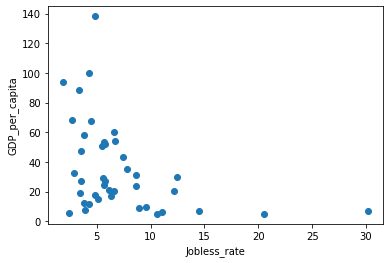

In [17]:
#Is the Jobless Rate correlated to de GDP per capita? 

import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)

plt.scatter(x=europe_2['Jobless Rate'], y=europe_2['GDP per capita (thousands)'])
plt.xlabel('Jobless_rate')
plt.ylabel('GDP_per_capita')
plt.show()

We can see an inverse correlation between the variables. The highest GDP per capita has a very low jobless rate and the highest jobless rate has a very low GDP per capita. However a low jobless rate doesn't mean high GDP and viceversa. 

In [18]:
conditions = [
    (europe_2['Jobless Rate'] < 5),
    (europe_2['Jobless Rate'] >= 5) & (europe_2['Jobless Rate'] < 10),
    (europe_2['Jobless Rate'] >= 10) & (europe_2['Jobless Rate'] < 15),
    (europe_2['Jobless Rate'] >= 15)
    ]

values = [0, 1, 2 ,3]

europe_2['jobless_rate_tier'] = np.select(conditions, values)

In [19]:
europe_2.head()

,Country,GDP (billions),GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account (billions),Population (millions),GDP per capita (thousands),jobless_rate_tier
1,Germany,4223,1.7,0.1,1.25,10.0,5.5,-3.7,69.3,7.4,83.16,50.781626,1
2,United Kingdom,3187,4.4,0.2,2.25,9.9,3.5,-6.0,95.9,-2.6,67.53,47.193840,0
3,France,2937,4.2,0.5,1.25,5.6,7.4,-6.5,112.9,0.4,67.63,43.427473,1
4,Italy,2100,5.0,1.1,1.25,8.9,7.8,-7.2,150.8,2.5,59.24,35.449021,1
5,Russia,1776,-4.1,-0.8,7.50,13.7,3.8,0.8,18.2,6.8,145.55,12.201992,0


In [20]:
tier_0_GDP = europe_2[europe_2['jobless_rate_tier'] == 0]['GDP per capita (thousands)']
tier_1_GDP = europe_2[europe_2['jobless_rate_tier'] == 1]['GDP per capita (thousands)']
tier_2_GDP = europe_2[europe_2['jobless_rate_tier'] == 2]['GDP per capita (thousands)']
tier_3_GDP = europe_2[europe_2['jobless_rate_tier'] == 3]['GDP per capita (thousands)']


europe_gdp_mean = europe_2.groupby(['jobless_rate_tier']).agg({'GDP per capita (thousands)': 'mean'})

                      

                      


In [21]:
europe_gdp_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GDP per capita (thousands)  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0 bytes


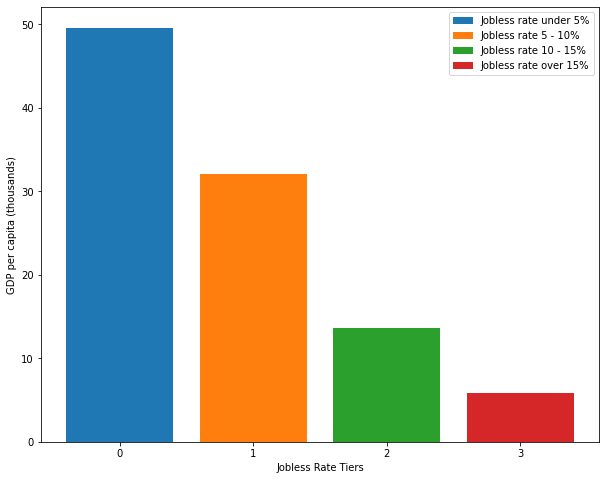

In [22]:
labels = ['Jobless rate under 5%', 'Jobless rate 5 - 10%', 'Jobless rate 10 - 15%', 'Jobless rate over 15%']
plt = reload(plt)
fig = plt.figure(figsize=(10, 8))

for i in europe_gdp_mean.index:
    plt.bar(i, europe_gdp_mean.loc[i]['GDP per capita (thousands)'], label=labels[i])

plt.xlabel('Jobless Rate Tiers')
plt.ylabel('GDP per capita (thousands)')
plt.xticks(europe_gdp_mean.index)
plt.legend()
plt.show()

In this bar chart we can clearly see there is an inverse correlation between the jobless rate and the GDP per capita. 

In the data we have all european countries but we can see a huge difference between countries. At the top we have western countries that, apart from UK, are members of the European Union or Schengen area. Then we have at the bottom eastern european countries which includes Turkey, Russia and Ukraine which are in war at this moment.

In [23]:
#difference between the highest GDP per capita and the lowest.
range_europe = europe_2['GDP per capita (thousands)'].max() - europe_2['GDP per capita (thousands)'].min()
print(difference_max_min)

NameError: name 'difference_max_min' is not defined

In [24]:
#As there is a huge difference i'm going to alculate the interquartile range
from scipy.stats import iqr
iqr(europe_2['GDP per capita (thousands)'])

39.746059505592314

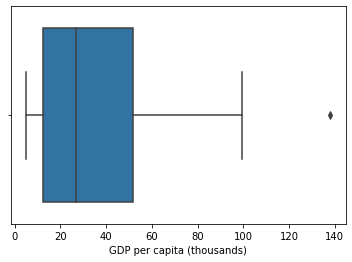

In [25]:
#A boxplot can be helpful to visualize better this information
sns.boxplot(x='GDP per capita (thousands)', data = europe_2)
plt.show()

We can see that the biggest gap between european countries is found in those countries with the highest GDP per capita. Just Luxemburg itself has a GDP 38% higher than the second country, Ireland. Apart from the jobless rate the are many factors that can explain this gap. With the data we have lets find other correlations.

In [26]:
europe_2.sort_values(by=['Debt/GDP'], ascending=False)

,Country,GDP (billions),GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account (billions),Population (millions),GDP per capita (thousands),jobless_rate_tier
21,Greece,216,7.70,1.20,1.25,12.00,12.20,-7.4,193.30,-5.9,10.68,20.224719,2
4,Italy,2100,5.00,1.10,1.25,8.90,7.80,-7.2,150.80,2.5,59.24,35.449021,1
20,Portugal,250,7.10,0.00,1.25,9.30,5.70,-2.8,127.40,-1.1,10.30,24.271845,1
6,Spain,1425,6.80,1.50,1.25,9.00,12.48,-6.9,118.40,0.9,47.40,30.063291,2
3,France,2937,4.20,0.50,1.25,5.60,7.40,-6.5,112.90,0.4,67.63,43.427473,1
12,Belgium,600,3.30,0.20,1.25,11.27,5.80,-5.5,108.20,-0.4,11.55,51.948052,1
34,Cyprus,28,6.10,0.60,1.25,8.74,8.60,-1.7,103.60,-7.2,0.90,31.111111,1
2,United Kingdom,3187,4.40,0.20,2.25,9.90,3.50,-6.0,95.90,-2.6,67.53,47.193840,0
15,Austria,477,6.00,1.50,1.25,10.50,5.70,-5.9,82.80,-0.5,8.93,53.415454,1
27,Croatia,68,7.70,2.00,2.50,12.30,6.30,-2.9,79.80,3.1,4.04,16.831683,1


In [27]:
europe_mean = europe_2['GDP per capita (thousands)'].median()
print(europe_mean)

26.857142857142858


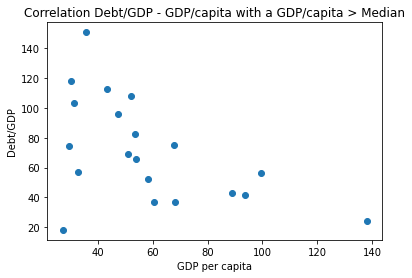

In [28]:
plt = reload(plt)
plt.scatter(x=europe_2[europe_2['GDP per capita (thousands)'] > europe_mean]['GDP per capita (thousands)'], y=europe_2[europe_2['GDP per capita (thousands)'] > europe_mean ]['Debt/GDP'])
plt.title('Correlation Debt/GDP - GDP/capita with a GDP/capita > Median')
plt.xlabel('GDP per capita')
plt.ylabel('Debt/GDP')
plt.show()

Its interesting to see that there is an inverse correlation between GDP per capita and the Debt/GDP when we analyze countries with the highest GDP per capita. If we made a list of countries we would find that most countries are part of the UE, specially the ones with highest debt. Esto es a causa a la facilidad de poder conseguir financión de los fondos europeos la cual no está al alcance de muchos países de Europa del este. En la siguiente gráfica podemos observar que no existe la misma correlación entre lo países con menor renta per capita.

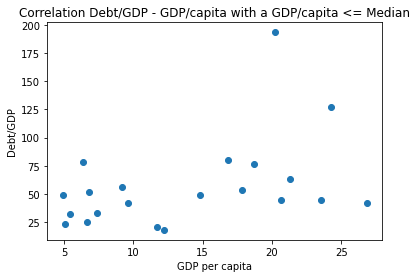

In [29]:
plt = reload(plt)
plt.scatter(x=europe_2[europe_2['GDP per capita (thousands)'] <= europe_mean]['GDP per capita (thousands)'], y=europe_2[europe_2['GDP per capita (thousands)'] <= europe_mean]['Debt/GDP'])
plt.title('Correlation Debt/GDP - GDP/capita with a GDP/capita <= Median')
plt.xlabel('GDP per capita')
plt.ylabel('Debt/GDP')
plt.show()